In [7]:
import numpy as np
import scipy.stats

import matplotlib.pyplot as plt

import seaborn
%matplotlib inline

from tqdm import tqdm

In [3]:
class EGreedyMAB:
    
    def __init__(self, epsilon=.1):
        self.arm_feedback = {}
        self.arm_plays = {}
        self.arm_mean_payoff = {}
        self.epsilon = epsilon
        
        
    def get_decision(self,arm_id_list, arm_feature_list):
        np.random.shuffle(arm_id_list)
        current_averages = {id: self.arm_mean_payoff.get(id,100) for id in arm_id_list}
        
        if np.random.rand() < self.epsilon:
            return np.random.choice(arm_id_list)
        else:
            return max(current_averages, key=current_averages.get)
    
    def update(self, arm_id, reward):
        self.arm_feedback[arm_id] = self.arm_feedback.get(arm_id,0) + reward
        self.arm_plays[arm_id] = self.arm_plays.get(arm_id,0) + 1.0
        self.arm_mean_payoff[arm_id] = self.arm_feedback[arm_id] / self.arm_plays[arm_id]

In [4]:
class SimpleSimulator:
    
    def __init__(self,n_arms):
        self.arm_probs = {}
        for i in np.arange(n_arms):
            self.arm_probs[i] = scipy.stats.uniform.rvs(0,.2)
    
    def get_available_arms(self):
        return self.arm_probs.keys(), []
    
    def get_reward(self, arm_id):
        return scipy.stats.bernoulli.rvs(self.arm_probs.get(arm_id,0)   )
    

In [8]:
TIME_STEPS = 50000
N_ARMS = 500
sim = SimpleSimulator(N_ARMS)

mab = EGreedyMAB()
reward_list = []
for t in tqdm(np.arange(TIME_STEPS)):
    arms, arm_features = sim.get_available_arms()
    arm_to_play = mab.get_decision(arms, arm_features)
    
    reward = sim.get_reward(arm_to_play)
    mab.update(arm_to_play, reward)
    
    reward_list.append(reward)

    

print 'total_reward', np.sum(reward_list)

100%|██████████| 50000/50000 [00:21<00:00, 2292.89it/s]

total_reward 8822


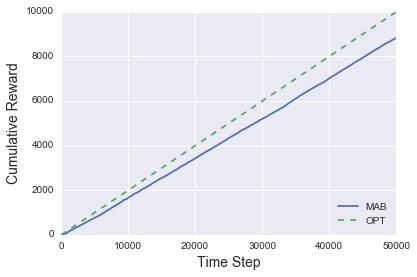

In [9]:
max_payoff = max(sim.arm_probs.values())

plt.plot(np.arange(len(reward_list)), np.cumsum(reward_list), label='MAB')

plt.plot(np.arange(TIME_STEPS), np.cumsum([max_payoff]*TIME_STEPS), label='OPT', ls='--')

plt.legend(loc='lower right')

plt.xlabel("Time Step", fontsize=14)

plt.ylabel("Cumulative Reward", fontsize=14)

In [53]:
np.random.rand()

0.7050949256753315